In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from scipy.fftpack import fft, fftfreq, rfft, rfftfreq, fftshift, ifft
from IPython.display import display, Audio

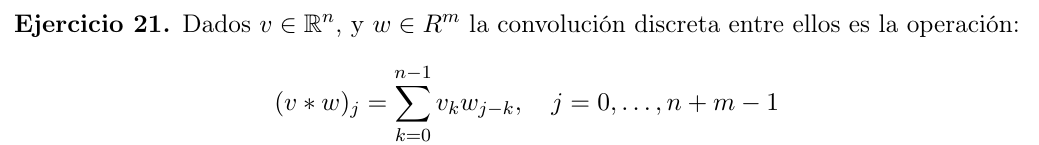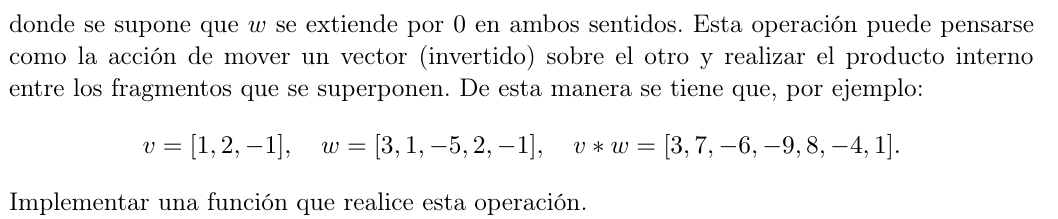

In [ ]:
def convolucion_discreta(v, w):
  convolucion = []
  for j in range(0, len(v) + len(w) - 1):
    suma = 0
    for k in range(max(0, j - len(w) +1), len(v)):
      if (j - k >= 0):
        suma += v[k] * w[j - k]
    convolucion.append(suma)
  return convolucion

print(convolucion_discreta([1, 2, -1], [3, 1, -5, 2, -1]))

[3, 7, -6, -9, 8, -4, 1]


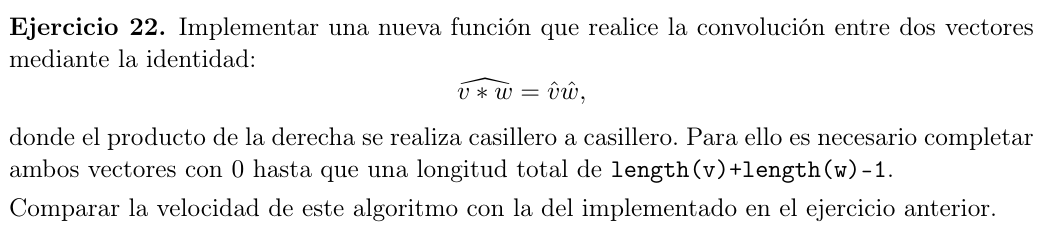

In [ ]:
def convolucion_propiedad_transformada(v, w):
    n = len(v) + len(w) - 1
    Fv = fft(v, n) #Transforma y completa el vector hasta n con ceros
    Fw = fft(w, n) #Transforma y completa el vector hasta n con ceros
    F = Fv * Fw #Multiplica las transformadas
    result = ifft(F).real #Antitransforma
    return result

print(convolucion_propiedad_transformada([1, 2, -1], [3, 1, -5, 2, -1]))

[ 3.  7. -6. -9.  8. -4.  1.]


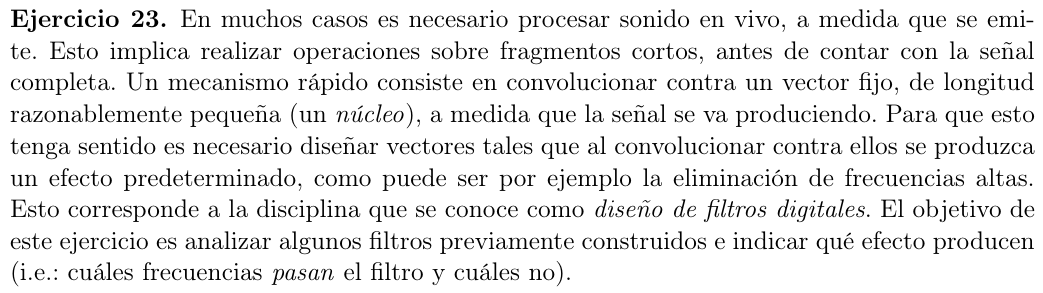

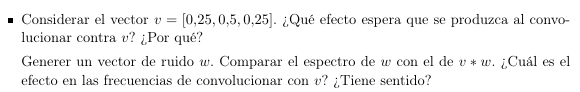

In [ ]:
#Espero que suavice las irregularidades porque le da más importancia al centro que a los extremos. Es como un núcleo triangular.
#Genero un vector de ruido w
N = 128
v = [0.25, 0.5, 0.25]
w = np.random.uniform(-1, 1, N - len(v) + 1).tolist()
conv_dis = convolucion_discreta(v,w)
conv_trans = convolucion_propiedad_transformada(v, w)
#print("Convolucion discreta", conv_dis)
#print("Convolucion con transformada", conv_trans)

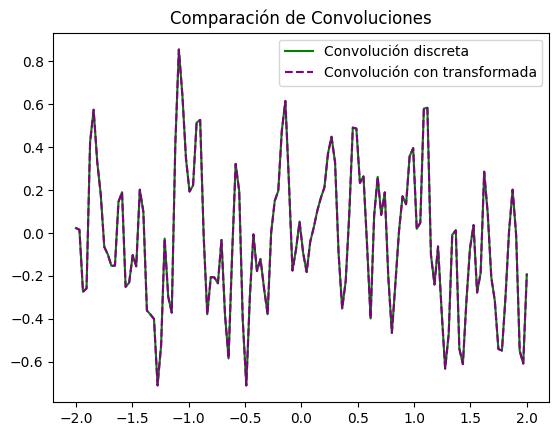

In [ ]:
#Primero chequeo que las dos funciones de convolucion dan el mismo resultado
t = np.linspace(-2, 2, len(conv_dis))
plt.plot(t, conv_dis, color = "g", label='Convolución discreta')
plt.plot(t, conv_trans, color = "purple", linestyle = "--", label='Convolución con transformada')
plt.title('Comparación de Convoluciones')
plt.legend()
plt.show()

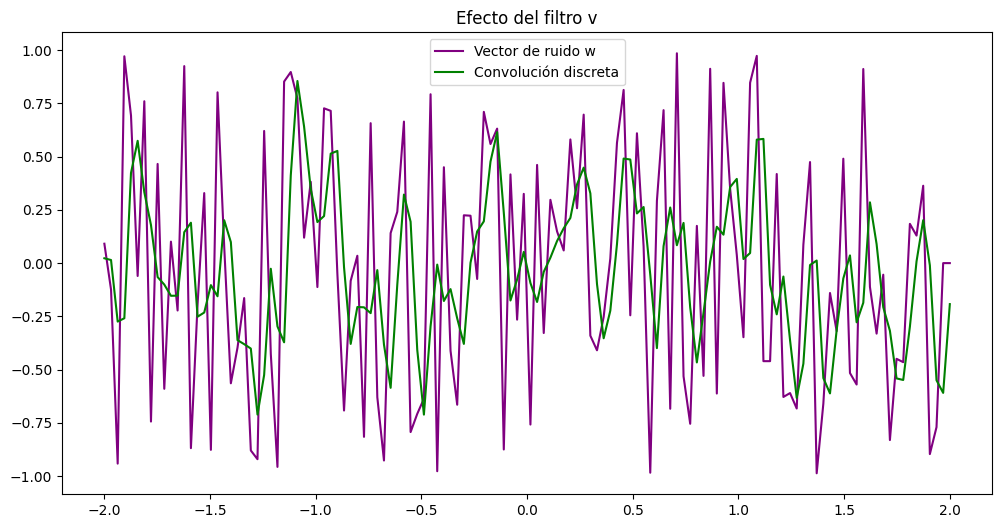

In [ ]:
# Ajustar el vector w añadiendo ceros al final para que coincida en longitud
w_padded = np.pad(w, (0, len(conv_dis) - len(w)), 'constant')


# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(t, w_padded, color = "purple" ,label='Vector de ruido w')
plt.plot(t, conv_dis, color = "g", label='Convolución discreta')
plt.title('Efecto del filtro v')
plt.legend()
plt.show()

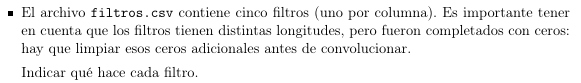

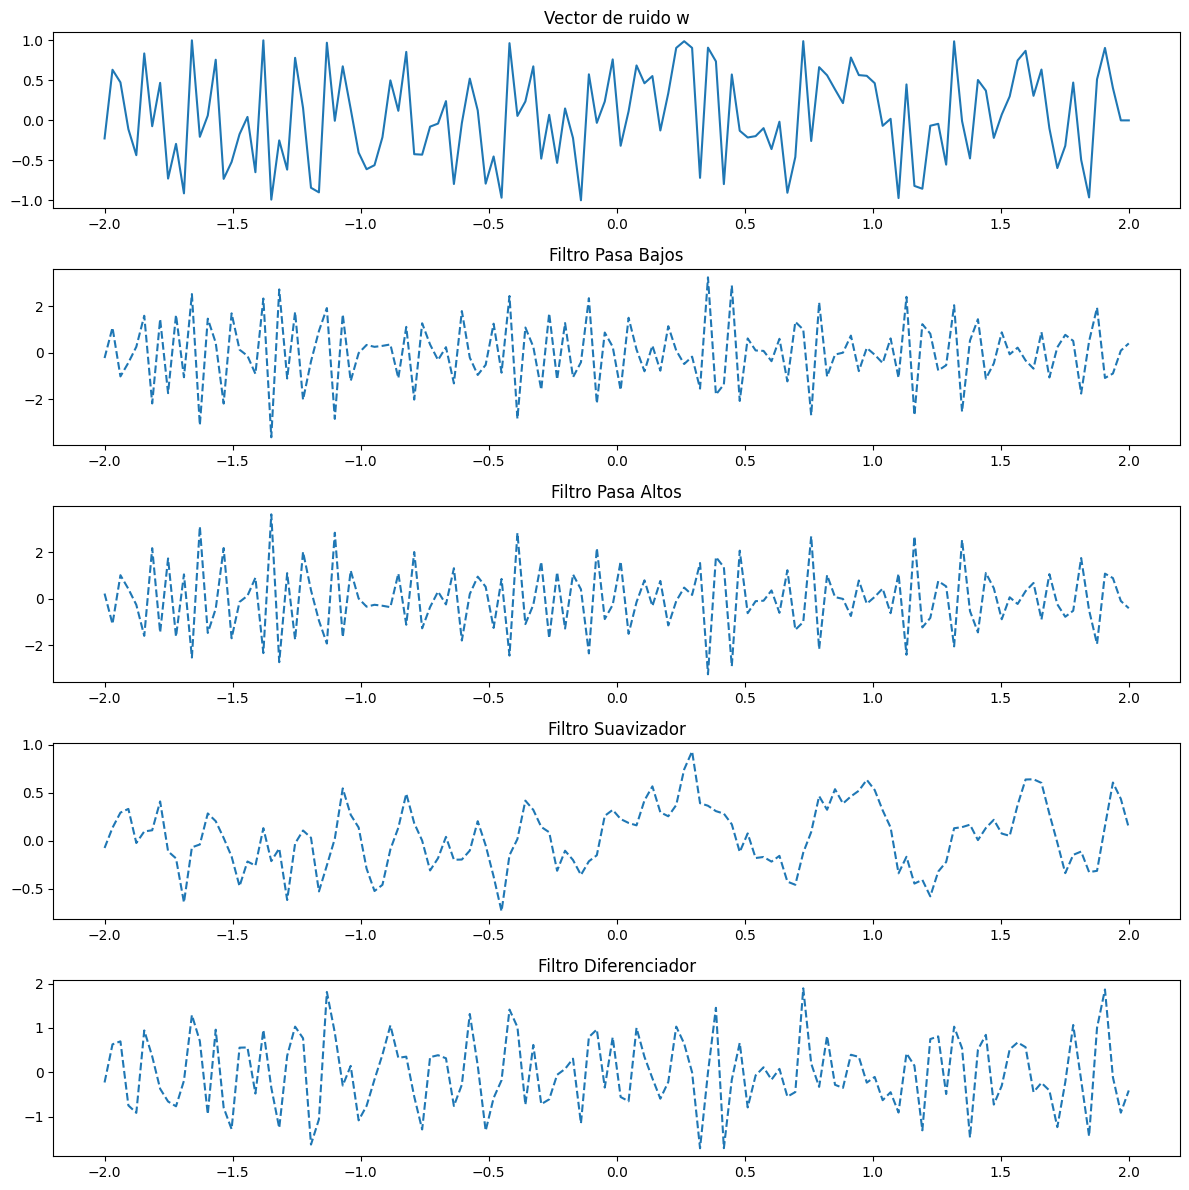

In [ ]:
# Generar un vector de ruido w
N = 128
w = np.random.uniform(-1, 1, N).tolist()

#Encontré estos filtros en internet porque no podía encontrar el archivo
low_pass_filter = [1, -2, 1]
high_pass_filter = [-1, 2, -1]
smoothing_filter = [1/3, 1/3, 1/3]
derivative_filter = [1, 0, -1]

conv_low_pass = convolucion_discreta(low_pass_filter, w)
conv_high_pass = convolucion_discreta(high_pass_filter, w)
conv_smoothing = convolucion_discreta(smoothing_filter, w)
conv_derivative = convolucion_discreta(derivative_filter, w)

# Ajustar el vector w añadiendo ceros al final para que coincida en longitud
w_padded = np.pad(w, (0, len(conv_low_pass) - len(w)), 'constant')
t = np.linspace(-2, 2, len(conv_low_pass))

# Graficar los resultados
plt.figure(figsize=(12, 12))

plt.subplot(5, 1, 1)
plt.plot(t, w_padded, label='Vector de ruido w')
plt.title('Vector de ruido w')

plt.subplot(5, 1, 2)
plt.plot(t, conv_low_pass, label='Filtro Pasa Bajos', linestyle='--')
plt.title('Filtro Pasa Bajos')

plt.subplot(5, 1, 3)
plt.plot(t, conv_high_pass, label='Filtro Pasa Altos', linestyle='--')
plt.title('Filtro Pasa Altos')

plt.subplot(5, 1, 4)
plt.plot(t, conv_smoothing, label='Filtro Suavizador', linestyle='--')
plt.title('Filtro Suavizador')

plt.subplot(5, 1, 5)
plt.plot(t, conv_derivative, label='Filtro Diferenciador', linestyle='--')
plt.title('Filtro Diferenciador')

plt.tight_layout()
plt.show()